### Blending Two Images
Suppose you have two images and you want to blend them so that features
of both images are visible. We use image registration techniques to blend
one image over the second one and determine whether there are any
changes.

In [1]:
import cv2
from skimage import io
import numpy as np

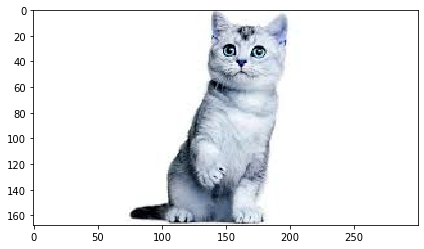

In [2]:
# Load the images using opencv
img1 = cv2.imread('cat1.jpg')
io.imshow(img1)

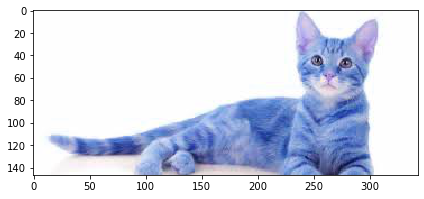

In [3]:
img2 = cv2.imread('cat2.jpg')
io.imshow(img2)

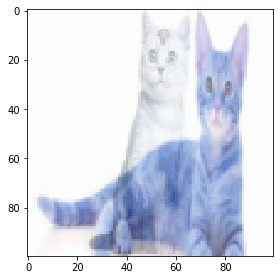

In [4]:
# Resize the image
from skimage.transform import resize
cat1 = resize(img1, (100,100))
cat2 = resize(img2, (100,100))

#Define alpha and beta
alpha = 0.30
beta = 0.70

final_image = cv2.addWeighted(cat1, alpha, cat2, beta, 0.0)
io.imshow(final_image)

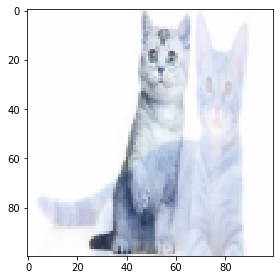

In [5]:
final_image = cv2.addWeighted(cat2, alpha, cat1, beta, 0.0)
io.imshow(final_image)

The alpha and beta parameters indicate the
transparency in both images. There are a few formulas
that help to determine the final blending. The last
parameter is called gamma. Currently it has a value of
zero. It’s just a scalar, which is added to the formulas,
to transform the images more effectively. In general,
gamma is zero.

### Changing Contrast and Brightness

To change contrast and brightness in an image, we should have an
understanding of what these two terms mean:


• Contrast: Contrast is the difference between maximum
and minimum pixel intensity.

• Brightness: Brightness refers to the lightness or
darkness of an image. To make an image brighter, we
add a constant number to all the pixels present in it.

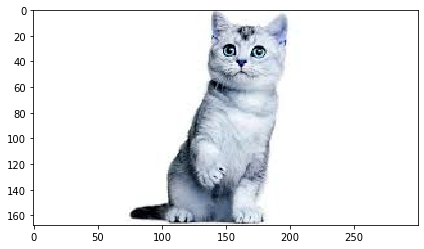

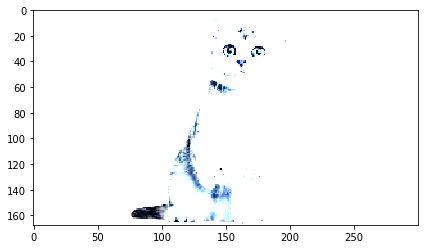

In [10]:
from pylab import * 

img1 = cv2.imread('cat1.jpg')

#Create a dummy image that stores different contrast and brightness
new_img = np.zeros(img1.shape, img1.dtype)

#Brightness and contrast parameters
contrast = 3.0
bright = 2

#Change the contrast and brightness
for y in range(img1.shape[0]):
    for x in range(img1.shape[1]):
        for c in range(img1.shape[2]):
            new_img[y,x,c] = np.clip(contrast*img1[y,x,c] + bright, 0, 255)
        
figure(0)
io.imshow(img1)
figure(1)
io.imshow(new_img)

np.clip() limits the values in a particular range. 

formula is derived:
(Specific pixel value × Contrast) + Brightness.

Using the this formula, we can change each and every pixel value,
and np.clip() makes sure the output value doesn’t go beyond 0 to 255.

### Adding Text to Images

cv2.putText() is a function present in the cv2 module that allows us to
add text to images.

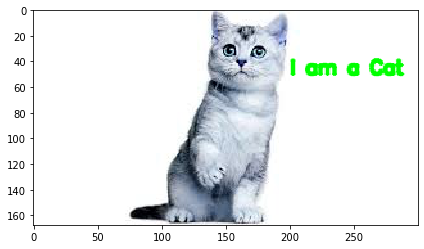

In [19]:
#Read image
image = cv2.imread("cat1.jpg")
#Define font
font = cv2.FONT_HERSHEY_SIMPLEX
#Write on the image
cv2.putText(image, "I am a Cat", (200, 50), font, 0.5, (0, 255, 0),
2, cv2.LINE_AA)
io.imshow(image)

### Smoothing Images

#### Median Filter

The median filter is one of the most basic image-smoothing filters. It’s a
nonlinear filter that removes black-and-white noise present in an image by
finding the median using neighboring pixels.

To smooth an image using the median filter, we look at the first
3 × 3 matrix, find the median of that matrix, then remove the central value
by that median. Next, we move one step to the right and repeat this process
until all the pixels have been covered. The final image is a smoothed
image. If you want to preserve the edges of your image while blurring, the
median filter is your best option.

cv2.medianBlur is the function used to achieve median blur. It has two
parameters:
1. The image we want to smooth
2. The kernel size, which should be odd. Thus, a value
of 9 means a 9 × 9 matrix.


#### Gaussian Filter

The gaussian filter depends on the standard deviation of the image
(distribution) and assumes the mean is zero (we can define a mean
different from zero as well). Gaussian filters do not take care of the edges.

Value of certain statistical parameter defines the preservation. It is used for
basic image blurring. It generally works by defining a kernel. Suppose we
define a 3 × 3 kernel. We apply this kernel to each and every pixel present
in the image, and average the result, which results in a blurred image.

cv2.GaussianBlur() is the function used to apply a gaussian filter. It
has three parameters:
1. The image, which needs to be blurred
2. The size of the kernel (3 × 3 in this case)
3. The standard deviation

#### Bilateral Filter

If we want to smooth an image and keep the edges intact, we use a bilateral
filter. Its implementation is simple: We replace the pixel value with the
average of its neighbors. This is a nonlinear smoothing approach that takes
the weighted average of neighboring pixels. “Neighbors” are defined in
following ways:

• Two pixel values are close to each other

• Two pixel values are similar to each other


cv2.bilateralFilter has four parameters:
1. The image we want to smooth
2. The diameter of the pixel neighborhood (defining
the neighborhood diameter to search for neighbors)
3. The sigma value for color (to find the pixels that are
similar)
4. The sigma value for space (to find the pixels that are
closer)

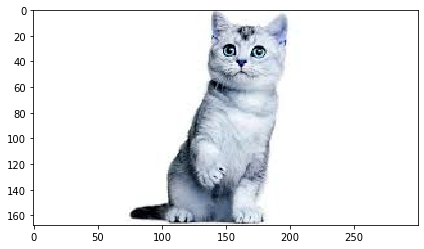

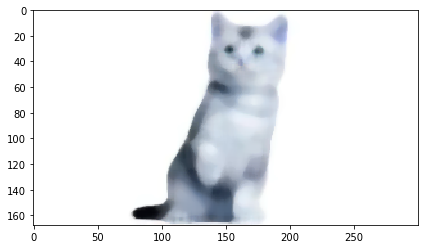

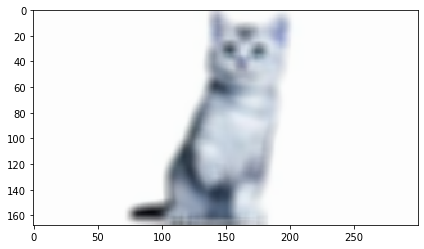

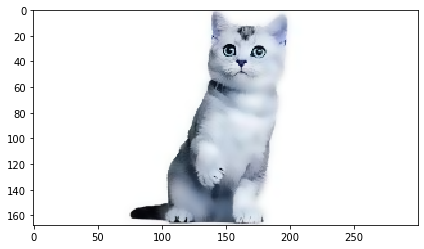

In [21]:
#Read images for different blurring purposes
image_Original = cv2.imread("cat1.jpg")
image_MedianBlur = cv2.imread("cat1.jpg")
image_GaussianBlur = cv2.imread("cat1.jpg")
image_BilateralBlur = cv2.imread("cat1.jpg")

#Blur images
image_MedianBlur=cv2.medianBlur(image_MedianBlur,9)
image_GaussianBlur=cv2.GaussianBlur(image_GaussianBlur,(9,9),10)
image_BilateralBlur=cv2.bilateralFilter(image_BilateralBlur,9,100,75)

#Show images
figure(0)
io.imshow(image_Original)
figure(1)
io.imshow(image_MedianBlur)
figure(2)
io.imshow(image_GaussianBlur)
figure(3)
io.imshow(image_BilateralBlur)

### Changing the Shape of Images

#### erosion and dilation

erosion and dilation, which are the two operations used to change the shape of images.

* Dilation results in the addition of pixels to the boundary of an object
* erosion leads to the removal of pixels from the boundary.


Two erode or dilate an image, we first define the neighborhood kernel,
which can be done in three ways:
1. MORPH_RECT: to make a rectangular kernel
2. MORPH_CROSS: to make a cross-shaped kernel
3. MORPH_ELLIPS: to make an elliptical kernel

The kernel finds the neighbors of a pixel, which helps us in eroding or
dilating an image. For dilation, the maximum value generates a new pixel
value. For erosion, the minimum value in a kernel generates a new pixel
value.


cv2.getStructuringElement() is the function used to define the kernel
and pass it down to the erode or dilate function. Its parameters:

• Erosion/dilation type

• Kernel size

• Point at which the kernel should start


After applying cv2.getStructuringElement() and getting the final
kernel, we use cv2.erode() and cv2.dilate() to perform the specific
operations.

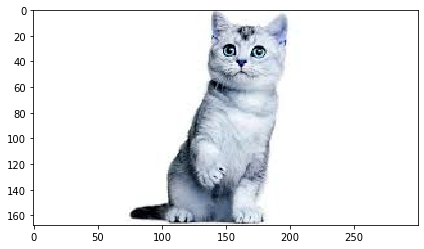

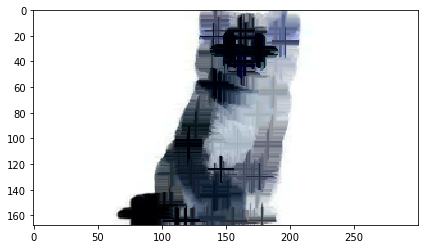

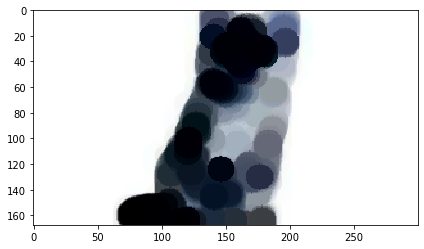

In [22]:
#DILATION CODE:

#Read image
image = cv2.imread("cat1.jpg")

#Define erosion size
s1 = 0
s2 = 10
s3 = 10

#Define erosion type
t1 = cv2.MORPH_RECT
t2 = cv2.MORPH_CROSS
t3 = cv2.MORPH_ELLIPSE

#Define and save the erosion template
tmp1 = cv2.getStructuringElement(t1, (2*s1 + 1, 2*s1+1), (s1, s1))
tmp2= cv2.getStructuringElement(t2, (2*s2 + 1, 2*s2+1), (s2, s2))
tmp3 = cv2.getStructuringElement(t3, (2*s3 + 1, 2*s3+1), (s3, s3))

#Apply the erosion template to the image and save in different variables
final1 = cv2.erode(image, tmp1)
final2 = cv2.erode(image, tmp2)
final3 = cv2.erode(image, tmp3)

#Show all the images with different erosions
figure(0)
io.imshow(final1)
figure(1)
io.imshow(final2)
figure(2)
io.imshow(final3)

C:\Users\ab59349\AppData\Local\Continuum\anaconda3\envs\imageprocessing\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


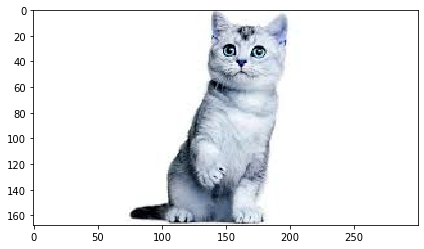

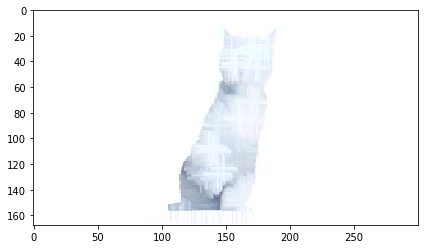

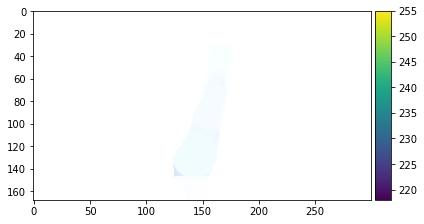

In [23]:
#EROSION CODE:

#Read images
image = cv2.imread("cat1.jpg")

#Define dilation size
d1 = 0
d2 = 10
d3 = 20

#Define dilation type
t1 = cv2.MORPH_RECT
t2 = cv2.MORPH_CROSS
t3 = cv2.MORPH_ELLIPSE

#Store the dilation templates
tmp1 = cv2.getStructuringElement(t1, (2*d1 + 1, 2*d1+1), (d1, d1))
tmp2 = cv2.getStructuringElement(t2, (2*d2 + 1, 2*d2+1), (d2, d2))
tmp3 = cv2.getStructuringElement(t3, (2*d3 + 1, 2*d3+1), (d3, d3))

#Apply dilation to the images
final1 = cv2.dilate(image, tmp1)
final2 = cv2.dilate(image, tmp2)
final3 = cv2.dilate(image, tmp3)

#Show the images
figure(0)
io.imshow(final1)
figure(1)
io.imshow(final2)
figure(2)
io.imshow(final3)

### Image Thresholding

The main reason you would do image thresholding is to segment images.
We try to get an object out of the image by removing the background and
by focusing on the object. To do this, we first convert the image to grayscale
and then into a binary format—meaning, the image contains black or
white only.

We provide a reference pixel value, and all the values above or below it
are converted to black or white. There are five thresholding types:

1. Binary: If the pixel value is greater than the reference
pixel value (the threshold value), then convert to
white (255); otherwise, convert to black (0).
2. Binary inverted: If the pixel value is greater than the
reference pixel value (the threshold value), then
convert to black (0); otherwise, convert to white
(255). Just the opposite of the binary type.
3. Truncated: If the pixel value is greater than the
reference pixel value (the threshold value), then
convert to the threshold value; otherwise, don’t
change the value.
4. Threshold to zero: If the pixel value is greater than the
reference pixel value (the threshold value), then don’t
change the value; otherwise convert to black (0).
5. Threshold to zero inverted: If the pixel value is
greater than the reference pixel value (the threshold
value), then convert to black (0); otherwise, don’t
change.


We use the cv2.threshold() function to do image thresholding, which
uses the following parameters:

• The image to convert

• The threshold value

• The maximum pixel value

• The type of thresholding (as listed earlier)

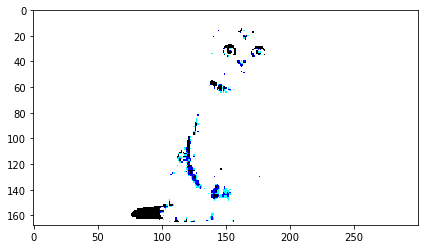

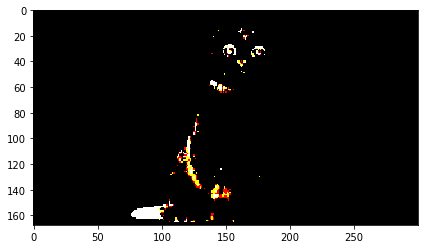

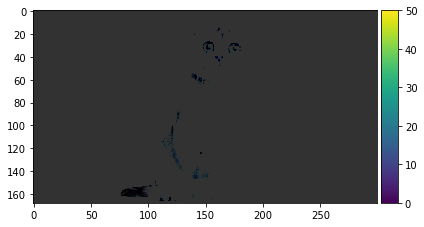

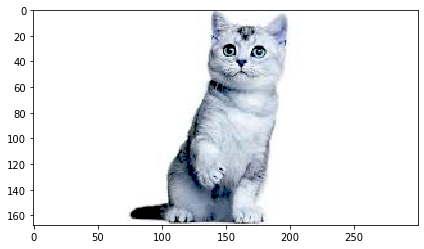

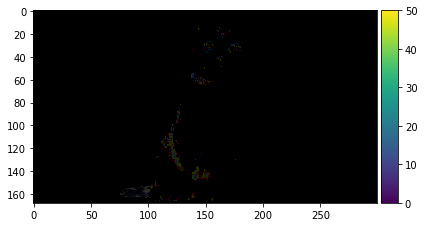

In [26]:
#Read image
image = cv2.imread("cat1.jpg")
#Define threshold types

'''
0 - Binary
1 - Binary Inverted
2 - Truncated
3 - Threshold To Zero
4 - Threshold To Zero Inverted
'''

#Apply different thresholds and save in different variables
_, img1 = cv2.threshold(image, 50, 255, 0 )
_, img2 = cv2.threshold(image, 50, 255, 1 )
_, img3 = cv2.threshold(image, 50, 255, 2 )
_, img4 = cv2.threshold(image, 50, 255, 3 )
_, img5 = cv2.threshold(image, 50, 255, 4 )

#Show the different threshold images
figure(0)
io.imshow(img1) #Prints Binary Image
figure(1)
io.imshow(img2) #Prints Binary Inverted Image
figure(2)
io.imshow(img3) #Prints Truncated Image
figure(3)
io.imshow(img4) #Prints Threshold to Zero Image
figure(4)
io.imshow(img5) #Prints Threshold to Zero Inverted Image

### Calculating Gradients

We look at edge detection using Sobel derivatives here. Edges are
found in two directions: the vertical direction and the horizontal direction.
With this algorithm, we emphasize only those regions that have very high
spatial frequency, which may correspond to edges. Spatial frequency is the
level of detail present in an area of importance.

In the following code, we read the image, apply gaussian blur so the
noise is removed, then convert the image to grayscale. We use the
cv2.cvtColor() function to convert the image to grayscale. Last, we give the grayscale output to
the cv2.Sobel() function.

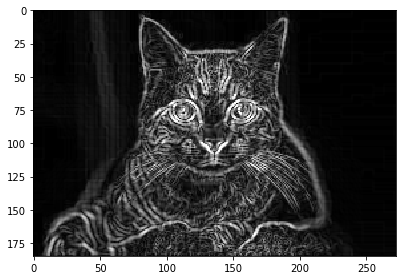

In [27]:
#Read image
src = cv2.imread("cat.jpg")
#Apply gaussian blur
cv2.GaussianBlur(src, (3, 3), 0)
#Convert image to grayscale
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

#Apply Sobel method to the grayscale image
#Horizontal Sobel Derivation
grad_x = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT) 
#Vertical Sobel Derivation
grad_y = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT) 

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
#Apply both
#Show the image
io.imshow(grad)

### Performing Histogram Equalization

Histogram equalization is used to adjust the contrast of an image. We
first plot the histogram of pixel intensity distribution and then modify it.
There is a cumulative probability function associated with every image.
Histogram equalization gives linear trend to that function. We should use a
grayscale image to perform histogram equalization.

The cv2.equalizeHist() function is used for histogram equalization.

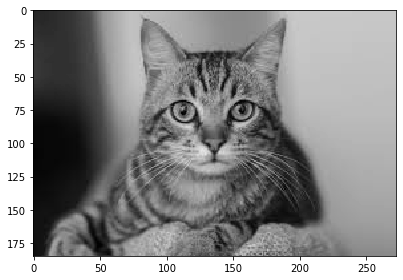

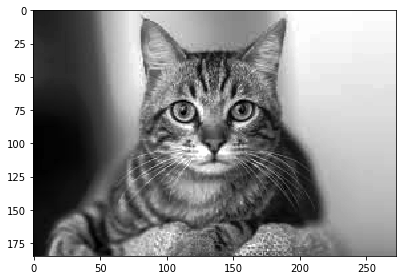

In [30]:
#Read image
src = cv2.imread("cat.jpg")
#Convert to grayscale
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
#Apply equalize histogram
src_eqlzd = cv2.equalizeHist(src) #Performs Histogram Equalization
#Show both images
figure(0)
io.imshow(src)
figure(1)
io.imshow(src_eqlzd)